## Customer Churn

In [1]:
# Importando Bibliotecas Necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

In [2]:
# Importando os dados de treino
df = pd.read_csv("projeto4_telecom_treino.csv", sep = ",", encoding_errors='ignore')

In [3]:
# Mostrar todas as colunas do dataframe
pd.set_option('display.max_columns', None)

In [4]:
df.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    KS             128  area_code_415                 no   
1           2    OH             107  area_code_415                 no   
2           3    NJ             137  area_code_415                 no   
3           4    OH              84  area_code_408                yes   
4           5    OK              75  area_code_415                yes   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls churn  
0                              1    no  
1                              1    no  
2                              0    no  
3                              2    no  
4                              3    no

In [5]:
df.tail()

Unnamed: 0 state  account_length      area_code international_plan  \
3328        3329    AZ             192  area_code_415                 no   
3329        3330    WV              68  area_code_415                 no   
3330        3331    RI              28  area_code_510                 no   
3331        3332    CT             184  area_code_510                yes   
3332        3333    TN              74  area_code_415                 no   

     voice_mail_plan  number_vmail_messages  total_day_minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  \
3328               77             26.55              215.5              126   
3329               57             39.29              153.4               55   
3330              109             30.74              288.8               58   
3331              105             36.35              159.6               84   
3332              113             39.85              265.9               82   

      total_eve_charge  total_night_minutes  total_night_calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total_night_charge  total_intl_minutes  total_intl_calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total_intl_charge  number_customer_service_calls churn  
3328               2.67                              2    no  
3329               2.59                              3    no  
3330               3.81                              2    no  
3331               1.35                              2    no  
3332               3.70                              0    no

In [6]:
# Substituindo no por 0
df.replace('no',0, inplace = True)


In [7]:
# Substituindo yes por 1
df.replace('yes',1, inplace = True)

In [8]:
# Apagando o texto area_code_ do campo area_code
df.replace({'area_code_':''}, regex = True, inplace = True)

In [9]:
# Excluindo primeira coluna (sequencial)
del df['Unnamed: 0']

In [10]:
# Excluindo a variável state
del df['state']

In [11]:
# Excluindo a variável area_code
del df['area_code']

In [12]:
df.head()

account_length  international_plan  voice_mail_plan  number_vmail_messages  \
0             128                   0                1                     25   
1             107                   0                1                     26   
2             137                   0                0                      0   
3              84                   1                0                      0   
4              75                   1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  number_customer_service_calls  churn  
0               2.70                              1      0  
1               3.70                              1      0  
2               3.29                              0      0  
3               1.78                              2      0  
4               2.73                              3      0

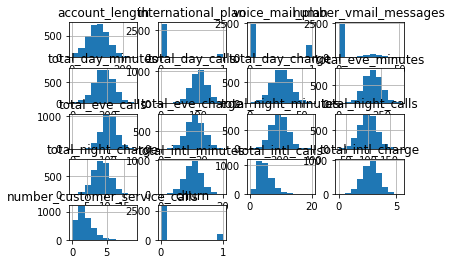

In [13]:
df.hist()
plt.show()

In [14]:
df.dtypes

account_length                     int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                              int64
dtype: object

In [15]:
# Verificando se existe algum registro NA
df.isna().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [16]:
# Verificando se existe algum registro Null
df.isnull().sum()

account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

## Separando a variável churn

In [17]:
# Variável TARGET(churn)
y_treino = df.churn

In [18]:
# Variáveis de Entrada
X_treino = df.drop('churn', axis = 1)

## Analisando a correlação entre as variáveis

In [19]:
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_152269/3733241504.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [20]:
# Excluindo colunas com correlação acima de 0.70 e gravando o resultado na variável X
excluir_colunas = ['number_vmail_messages','total_day_minutes','total_eve_charge',
                   'total_night_charge','total_intl_charge']

X_treino.drop(excluir_colunas, axis = 1, inplace = True) 


In [21]:
# Verificando a correlação após a exclusão das colunas
corr = X_treino.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_152269/2815337105.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


In [22]:
# Shape dos dados após seleção das variáveis
X_treino.shape

(3333, 12)

### Balanceamento de Classes

In [23]:
# Verificando a proporção de 0 e 1 nas classes
y_treino.value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [24]:
# As classes estão desbalanceadas
# Será necessário utilizar o recurso da biblioteca imblearn para balancear
import imblearn
from imblearn.over_sampling import SMOTE

In [25]:
# Serão criados dados sintéticos para a classe 1
over_sampler = SMOTE(k_neighbors = 5)
X_btreino, y_btreino = over_sampler.fit_resample(X_treino, y_treino)

In [26]:
# Verificando se as classes ficaram balanceadas após o processamento
y_btreino.value_counts()

0    2850
1    2850
Name: churn, dtype: int64

### Normalização dos dados

In [27]:
# A normalização dos dados é um pré requisito para o modelo de regressão logística
# Será utilizado aqui o método StandardScaler da Scikit-Learn
from sklearn.preprocessing import StandardScaler

X_btreino = StandardScaler().fit_transform(X_btreino)

### Algoritmo Regressão Logística

In [28]:
# Define lista de hiperparâmetros
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l2']}

In [29]:
# Criaremos o modelo com GridSearch 
# Vários modelos serão criados com diferentes combinações de hiperparâmetros
modelo_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1,                        
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [30]:
# Treinamento do modelo
modelo_v1.fit(X_btreino, y_btreino)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l2']},
             scoring='roc_auc')

In [31]:
# Melhor modelo
modelo_v1.best_estimator_

LogisticRegression(C=0.1)

### Importando dados de teste

In [32]:
# Importando os dados de treino
df_teste = pd.read_csv("projeto4_telecom_teste.csv", sep = ",", encoding_errors='ignore')

In [33]:
df_teste.head()

Unnamed: 0 state  account_length      area_code international_plan  \
0           1    HI             101  area_code_510                 no   
1           2    MT             137  area_code_510                 no   
2           3    OH             103  area_code_408                 no   
3           4    NM              99  area_code_415                 no   
4           5    SC             108  area_code_415                 no   

  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  \
0              no                      0               70.9              123   
1              no                      0              223.6               86   
2             yes                     29              294.7               95   
3              no                      0              216.8              123   
4              no                      0              197.4               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  \
0             12.05              211.9               73             18.01   
1             38.01              244.8              139             20.81   
2             50.10              237.3              105             20.17   
3             36.86              126.4               88             10.74   
4             33.56              124.0              101             10.54   

   total_night_minutes  total_night_calls  total_night_charge  \
0                236.0                 73               10.62   
1                 94.2                 81                4.24   
2                300.3                127               13.51   
3                220.6                 82                9.93   
4                204.5                107                9.20   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.6                 3               2.86   
1                 9.5                 7               2.57   
2                13.7                 6               3.70   
3                15.7                 2               4.24   
4                 7.7                 4               2.08   

   number_customer_service_calls churn  
0                              3    no  
1                              0    no  
2                              1    no  
3                              1    no  
4                              2    no

In [34]:
# Substituindo no por 0
df_teste.replace('no',0, inplace = True)

In [35]:
# Substituindo yes por 1
df_teste.replace('yes',1, inplace = True)

In [36]:
# Apagando o texto area_code_ do campo area_code
df_teste.replace({'area_code_':''}, regex = True, inplace = True)

In [37]:
# Excluindo primeira coluna (sequencial)
del df_teste['Unnamed: 0']

In [38]:
# Excluindo a variável state
del df_teste['state']

In [39]:
# Excluindo a variável area_code
del df_teste['area_code']

In [40]:
# Selecionando as mesmas variáveis utilizadas no treinamento
X_teste = df_teste[X_treino.columns]

In [41]:
# Selecionando a variável target
y_teste = df_teste.churn

In [42]:
X_teste.head()

account_length  international_plan  voice_mail_plan  total_day_calls  \
0             101                   0                0              123   
1             137                   0                0               86   
2             103                   0                1               95   
3              99                   0                0              123   
4             108                   0                0               78   

   total_day_charge  total_eve_minutes  total_eve_calls  total_night_minutes  \
0             12.05              211.9               73                236.0   
1             38.01              244.8              139                 94.2   
2             50.10              237.3              105                300.3   
3             36.86              126.4               88                220.6   
4             33.56              124.0              101                204.5   

   total_night_calls  total_intl_minutes  total_intl_calls  \
0                 73                10.6                 3   
1                 81                 9.5                 7   
2                127                13.7                 6   
3                 82                15.7                 2   
4                107                 7.7                 4   

   number_customer_service_calls  
0                              3  
1                              0  
2                              1  
3                              1  
4                              2

In [43]:
# Normalizando os dados de teste
X_teste = StandardScaler().fit_transform(X_teste)

### Previsão com os dados de teste

In [44]:
# Previsões com dados de teste
y_pred_v1 = modelo_v1.predict(X_teste)

In [45]:
# Obtemos as previsões no formato de probabilidade para cada classe
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)

In [46]:
# Obtemos as previsões no formato de probabilidade filtrando para a classe positiva
# Precisamos disso para calcula a Curva ROC
y_pred_proba_v1 = modelo_v1.predict_proba(X_teste)[:,1]

In [47]:
# Matriz de confusão
confusion_matrix(y_teste, y_pred_v1)

array([[832, 611],
       [ 36, 188]])

In [48]:
# Extraindo cada valor da CM
tn, fp, fn, tp = confusion_matrix(y_teste, y_pred_v1).ravel()

In [49]:
# Calcula a métrica global AUC (Area Under The Curve) com dados reais e previsões em teste
roc_auc_v1 = roc_auc_score(y_teste, y_pred_v1)
print(roc_auc_v1)

0.7079311454311454


In [50]:
# Calcula a curva ROC com dados e previsões em teste
fpr_v1, tpr_v1, thresholds = roc_curve(y_teste, y_pred_proba_v1)

In [51]:
# AUC em teste
auc_v1 = auc(fpr_v1, tpr_v1)
print(auc_v1)

0.8131806256806257


In [52]:
# Acurácia em teste
acuracia_v1 = accuracy_score(y_teste, y_pred_v1)
print(acuracia_v1)

0.611877624475105
